In [39]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage.filters import gaussian_filter1d



In [40]:
byboro = pd.read_csv('data/groupby_borough_5.csv')       #read a csv file
byclass = pd.read_csv('data/groupby_bldgclass_5.csv')     #read a csv file
byboro1 = pd.read_csv('data/groupby_borough.csv')       #read a csv file
byclass1 = pd.read_csv('data/groupby_bldgclass.csv')     #read a csv file

In [41]:
byboro_pivot_count = pd.pivot_table(byboro, values='bldg_count', index=['year'],
                    columns=['borough'],  fill_value=0)
byboro_pivot_area = pd.pivot_table(byboro, values='tot_area', index=['year'],
                    columns=['borough'], fill_value=0)
byboro1_pivot_count = pd.pivot_table(byboro1, values='bldg_count', index=['year'],
                    columns=['borough'],  fill_value=0)
byboro1_pivot_area = pd.pivot_table(byboro1, values='tot_area', index=['year'],
                    columns=['borough'], fill_value=0)

byclass_pivot_count = pd.pivot_table(byclass, values='bldg_count', index=['year'],
                    columns=['bldgtype'], fill_value=0)
byclass_pivot_area = pd.pivot_table(byclass, values='tot_area', index=['year'],
                    columns=['bldgtype'], fill_value=0)

byclass1_pivot_count = pd.pivot_table(byclass1, values='bldg_count', index=['year'],
                    columns=['bldgtype'], fill_value=0)
byclass1_pivot_area = pd.pivot_table(byclass1, values='tot_area', index=['year'],
                    columns=['bldgtype'], fill_value=0)

In [42]:
byclass1_pivot_area

bldgtype,Commercial,Industrial,Mixed,Other,Residential
year,,,,,
1795,0,0,0,0,3384
1799,0,0,0,17720,0
1800,13321,6620,77601,8837,50752
1802,7774,0,0,4137,17111
1803,0,0,0,0,11250
...,...,...,...,...,...
2017,33695848,5118246,1378468,14579144,63038470
2018,25402155,3600092,1053610,5087041,50719193
2019,20438493,3498617,683921,4987807,48204194


In [44]:
byboro1_pivot_count_smooth = pd.DataFrame(gaussian_filter1d(byboro1_pivot_count, sigma=3, axis=0),
                          columns= ['BK', 'BX', 'MN', 'QN', 'SI'])
byboro1_pivot_count_smooth.index = byboro1_pivot_count.index

byboro1_pivot_area_smooth = pd.DataFrame(gaussian_filter1d(byboro1_pivot_area, sigma=3, axis=0),
                          columns= ['BK', 'BX', 'MN', 'QN', 'SI'])
byboro1_pivot_area_smooth.index = byboro1_pivot_area.index

byclass1_pivot_count_smooth = pd.DataFrame(gaussian_filter1d(byclass1_pivot_count, sigma=3, axis=0),
                          columns= ['Commercial', 'Industrial', 'Mixed', 'Other', 'Residential'])
byclass1_pivot_count_smooth.index = byclass1_pivot_count.index

byclass1_pivot_area_smooth = pd.DataFrame(gaussian_filter1d(byclass1_pivot_area, sigma=3, axis=0),
                          columns= ['Commercial', 'Industrial', 'Mixed', 'Other', 'Residential'])
byclass1_pivot_area_smooth.index = byclass1_pivot_area.index

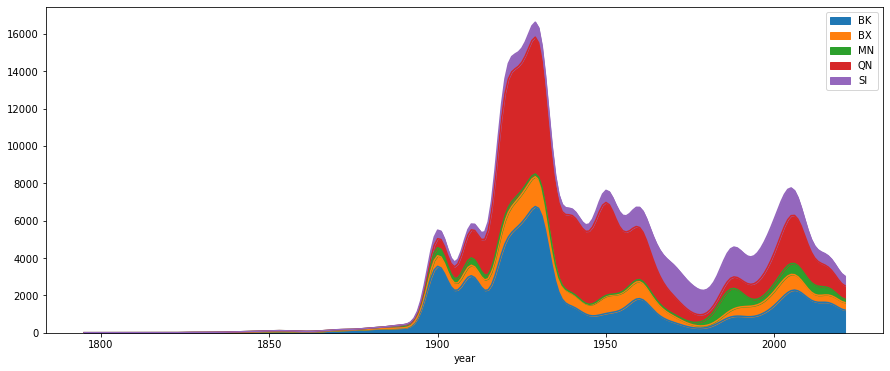

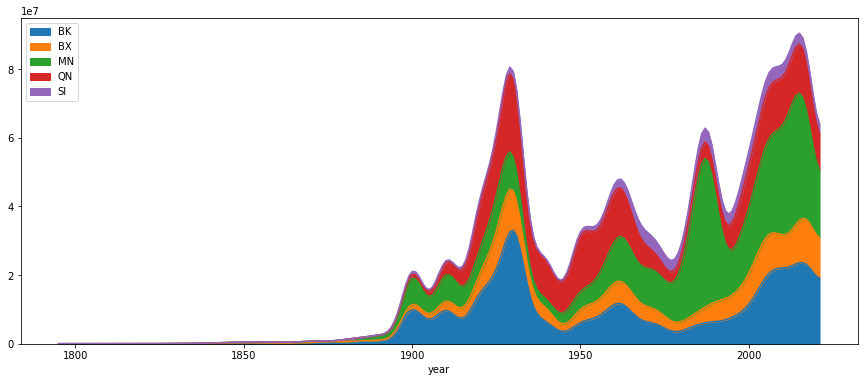

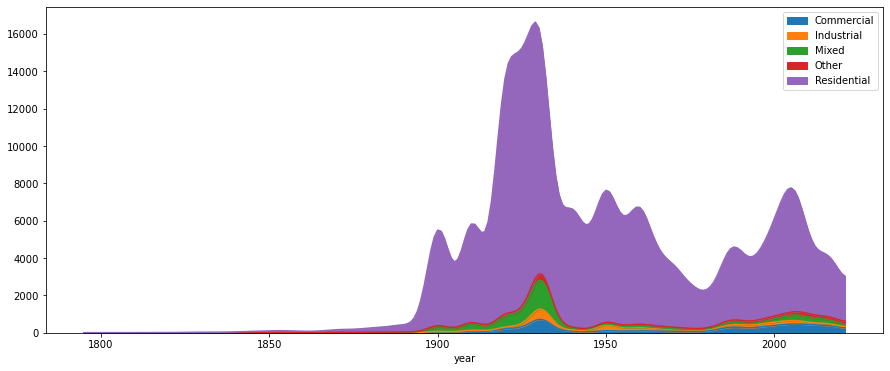

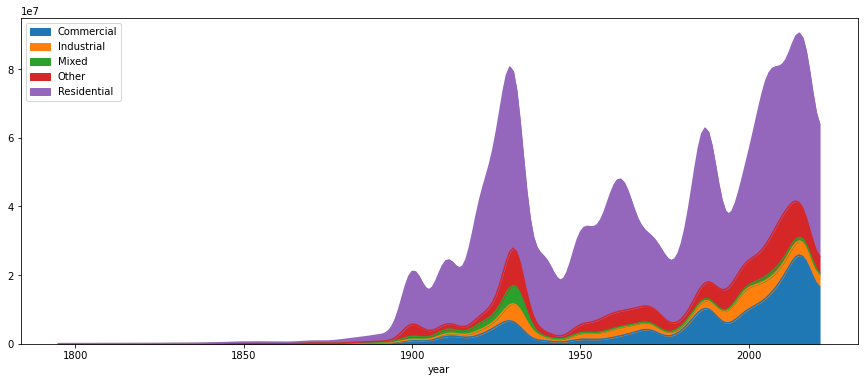

In [46]:
fig1 = byboro1_pivot_count_smooth.plot.area(stacked=True, figsize=(15, 6))
fig2 = byboro1_pivot_area_smooth.plot.area(stacked=True, figsize=(15, 6))
fig3 = byclass1_pivot_count_smooth.plot.area(stacked=True, figsize=(15, 6))
fig4 = byclass1_pivot_area_smooth.plot.area(stacked=True, figsize=(15, 6))


In [29]:
fig3 = byclass1_count_new.plot.bar(stacked=True, figsize=(15, 6))
fig4 = byclass1_area_new.plot.bar(stacked=True, figsize=(15, 6))

NameError: name 'byclass1_count_new' is not defined